# Problema del viajante de comercio

## Análisis de tiempos

In [1]:
%matplotlib inline
import timeit
import matplotlib.pyplot as plt

from functools import partial

from tsp_data import tsp_data
from tsp_parser import tsp_parser
from travelling_salesman_path import travelling_salesman_path, travelling_salesman_aprox_path

In [2]:
base_path = "test_files/"
test_files = ["ex04.tsp", "ex06.tsp", "ex08.tsp", "ex10.tsp", "ex11.tsp", "ex12.tsp", "ex13.tsp", "ex14.tsp", "p01.tsp",
              "ex16.tsp", "gr17.tsp", "ex18.tsp", "ex19.tsp", "ex20.tsp", "gr21.tsp"]

In [3]:
def plot_times(problems, savefig=False):

    x, times, times_aprox = [], [], []

    costs = {}

    def run_tsp_problem(problem):
        cost, path, space = travelling_salesman_path(problem)
        if problem.dimension() not in costs:
            costs[problem.dimension()] = {}
        costs[problem.dimension()]["tsp"] = cost
        
    def run_tsap_problem(problem):
        cost, path = travelling_salesman_aprox_path(problem.graph(True))
        if problem.dimension() not in costs:
            costs[problem.dimension()] = {}
        costs[problem.dimension()]["tsap"] = cost

    image_base_path = 'images/'
    filename = 'tsp'

    for problem in problems:
        print("cities: " + str(problem.dimension()))

        timer_aprox = timeit.Timer(partial(run_tsap_problem, problem))
        timer = timeit.Timer(partial(run_tsp_problem, problem))
        
        ran_times_aprox = timer_aprox.timeit(1)
        ran_times = timer.timeit(1)
        
        if problem.dimension() <= 10:
            x.append(problem.dimension())
            times_aprox.append(ran_times_aprox)
            times.append(ran_times)

    plt.plot(x, times, label = 'Bellman–Held–Karp')
    plt.plot(x, times_aprox, label = 'Aproximación')

    #plt.title('Tiempo de ejecución')
    plt.ylabel('Tiempo de ejecución [segundos]')
    plt.xlabel('Cantidad de ciudades')
    plt.legend(loc='upper left', prop={'size': 10})
    if savefig:
        # el nombre del archivo es: tsp_times.png
        plt.savefig(image_base_path + filename + '_times' +'.png', bbox_inches='tight')
    plt.show()
    
    print(costs)
    
    #plt.plot(x, space, label = '...')
    #plt.title('Espacio consumido')
    #plt.ylabel('Espacio utilizado [cantidad de conjuntos]')
    #plt.xlabel('Cantidad de ciudades')
    #plt.legend(loc='upper left', prop={'size': 10})
    #if savefig:
        # el nombre del archivo es: tsp_space.png
    #    plt.savefig('images/' + filename + '_space' +'.png', bbox_inches='tight')
    #plt.show()

cities: 4
cities: 6
cities: 8
cities: 10
cities: 11
cities: 12
cities: 13
cities: 14
cities: 15
cities: 16
cities: 17
cities: 18
cities: 19
cities: 20
cities: 21


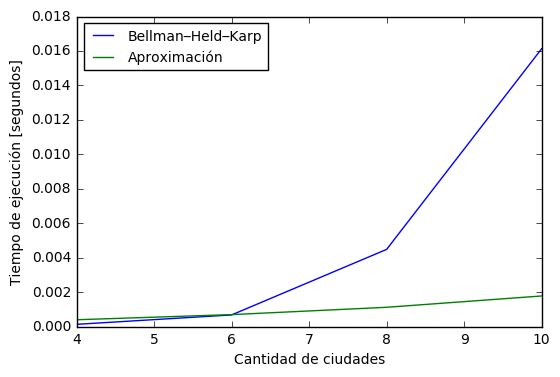

{4: {'tsp': 26, 'tsap': 31}, 6: {'tsp': 25, 'tsap': 38}, 8: {'tsp': 39, 'tsap': 39}, 10: {'tsp': 144, 'tsap': 145}, 11: {'tsp': 200, 'tsap': 325}, 12: {'tsp': 118, 'tsap': 165}, 13: {'tsp': 210, 'tsap': 235}, 14: {'tsp': 171, 'tsap': 429}, 15: {'tsp': 291, 'tsap': 366}, 16: {'tsp': 165, 'tsap': 271}, 17: {'tsp': 2085, 'tsap': 2352}, 18: {'tsp': 371, 'tsap': 1144}, 19: {'tsp': 819, 'tsap': 1945}, 20: {'tsp': 694, 'tsap': 1817}, 21: {'tsp': 2707, 'tsap': 3803}}


In [4]:
problems = []

for file_name in test_files:
    file_path = base_path + file_name
    problems.append(tsp_parser.parse_tsp_file(file_path))

plot_times(problems, savefig = True)